## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_merge = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
pharm_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
pharm_merge["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pharm_merge[pharm_merge.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharm = pharm_merge[pharm_merge["Mouse ID"] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_pharm["Mouse ID"].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_pharm.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
regimen_median = clean_pharm.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
regimen_var = clean_pharm.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
regimen_std = clean_pharm.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
regimen_sem = clean_pharm.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary_stat = pd.DataFrame({"Tumor Volume (mm3) Mean": regimen_mean,
                            "Tumor Volume (mm3) Median": regimen_median,
                            "Tumor Volume (mm3) Variance": regimen_var,
                            "Tumor Volume (mm3) Standard Deviation": regimen_std,
                            "Tumor Volume (mm3) SEM": regimen_sem
                            })
summary_stat

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_stat_py = clean_pharm.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns=
                                                                            {"mean": "Tumor Volume (mm3) Mean",
                                                                            "median": "Tumor Volume (mm3) Median",
                                                                            "var": "Tumor Volume (mm3) Variance",
                                                                            "std": "Tumor Volume (mm3) Standard Deviation",
                                                                            "sem": "Tumor Volume (mm3) SEM"})
summary_stat_py

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

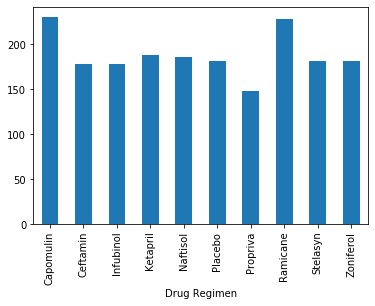

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. df.plot(kind=)
mice_count = clean_pharm.groupby('Drug Regimen')['Mouse ID'].count()
mice_treat_panda_plot = mice_count.plot(x="Drug Regimen", y="Number of Mice", kind="bar")
plt.show()


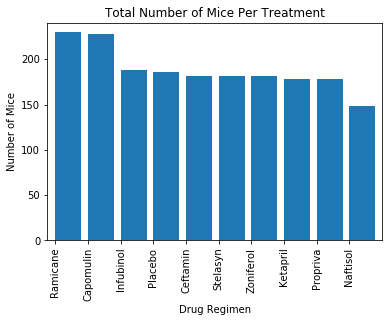

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_x = clean_pharm['Drug Regimen'].unique()
bar_height = clean_pharm['Drug Regimen'].value_counts()
plt.bar(bar_x, bar_height, align="edge")
plt.xticks(rotation="vertical")
plt.xlim(-0.25, len(bar_x))
plt.ylim(0, max(bar_height)+10)
plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


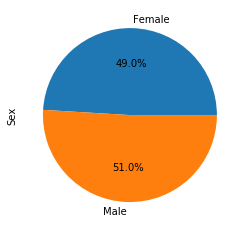

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = clean_pharm.groupby('Sex')['Sex'].count()
mice_sex_panda_plot = mice_gender.plot(y="Number of Mice", kind="pie", autopct="%1.1f%%")
plt.show()

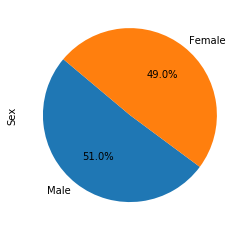

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_x = clean_pharm['Sex'].value_counts()
pie_label = clean_pharm['Sex'].unique()
plt.pie(pie_x, labels = pie_label, autopct="%1.1f%%", shadow=False, startangle=140)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_pharm.groupby(["Mouse ID"])["Timepoint"].last()
last_vol = clean_pharm.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
last_drug = clean_pharm.groupby(["Mouse ID"])["Drug Regimen"].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_1 = pd.merge(last_tp, last_vol, how="left", on=["Mouse ID"])
last_df = pd.merge(last_1, last_drug, how="left", on=["Mouse ID"])


pandas.core.series.Series

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [127]:
# Generate a line plot of time point versus tumor volume for a mouse(ONE MOUSE) treated with Capomulin


In [128]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [129]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
